In [1]:
import uproot
import numpy as np
import awkward as ak

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys

In [3]:
def getData(fname="", procName="Truth"):
    dq_dict = uproot.open(fname)["Truth"]
    dq_events = ak.zip({"Hits":ak.zip({
                                      "detID":   dq_dict["hit_detID"].array(),
                                      "edep":    dq_dict["hit_edep"].array(),
                                      "elmID":   dq_dict["hit_elmID"].array(),
                                      "truthx":  dq_dict["hit_truthx"].array(),
                                      "truthy":  dq_dict["hit_truthy"].array(),
                                      "truthz":  dq_dict["hit_truthz"].array(),
                                      })
                        }, depth_limit=1)
    
    return dq_events

In [4]:
def emcal_selection(arr):
    mask = (arr.detID == 100)
    return mask

def h1_selection(arr):
    mask = (arr.detID >= 31) & (arr.detID <= 32)
    return mask

def st3_selection(arr):
    mask = (arr.detID >= 19) & (arr.detID <= 30)
    return mask

def h4_selection(arr):
    mask = (arr.detID >= 41) & (arr.detID <= 46)
    return mask

In [9]:
Eta054 = "data/simeval_electrons_emcal_-6/sim_eval_Eta_0.540000_z500_600_eps_-6.root"
dq_hits = getData(Eta054)["Hits"]
print(len(dq_hits))
h1_mask = h1_selection(dq_hits)
h1_hits = dq_hits[h1_mask]
x_mask = (h1_hits.truthx >= -10) & (h1_hits.truthx <= 10)
x_index = np.where(ak.any(x_mask,axis=1))

print(h1_hits.truthx)
print(h1_hits[x_mask].truthx)
print(h1_hits[x_index].truthx)
print(ak.any(x_mask,axis=1))
print(len(ak.to_numpy(x_index)[0]))

10000
[[-1.79, -3.86], [-3.89, 0.973], [3.7, ... -12.5], [7.38, 6.54], [-10.1, -1.43]]
[[-1.79, -3.86], [-3.89, 0.973], [3.7, 2.74, ... [-9.22], [7.38, 6.54], [-1.43]]
[[-1.79, -3.86], [-3.89, 0.973], [3.7, ... -12.5], [7.38, 6.54], [-10.1, -1.43]]
[True, True, True, True, False, True, True, ... True, True, False, True, True, True]
7690


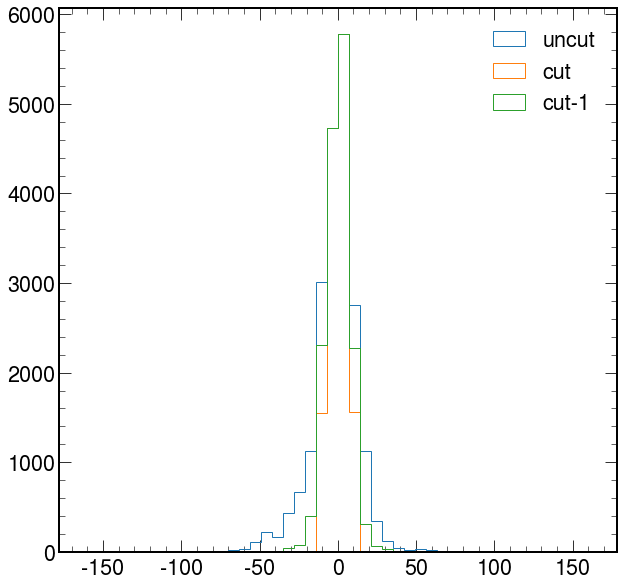

In [7]:
bins_range = [(46, (-162.008,162.008), "H1BT")]
plt.hist(ak.flatten(h1_hits.truthx),bins=bins_range[0][0],range=bins_range[0][1],histtype='step',label="uncut")
plt.hist(ak.flatten(h1_hits[x_mask].truthx),bins=bins_range[0][0],range=bins_range[0][1],histtype='step',label="cut")
plt.hist(ak.flatten(h1_hits[x_index].truthx),bins=bins_range[0][0],range=bins_range[0][1],histtype='step',label="cut-1")
plt.legend()

